# Different methods to calculate distance between two points on Earth (practice)

In this practical study, we will try to calculate distance between two different locations in Senegal with three different distance calculation methods in Geospatial using Python

In [1]:
import numpy as np
import math
import pandas as pd
import geopandas

In [17]:
origin = [14.797258213075306, -17.33764044044377] #Malika Dakar Senegal Coordinates
destination = [14.161114428585895, -16.062855285357273] #Medina Baye Great Mosque Kaolack Coordinates

# Euclidean Distance

In [2]:
#Origin latitude, longitude
origin = [14.797258213075306, -17.33764044044377] #Malika Dakar Senegal Coordinates
destination = [14.161114428585895, -16.062855285357273] #Medina Baye Great Mosque Kaolack Coordinates
def euclidean_distance(origin, destination):
    #euclidean distance
    distance = np.sqrt((origin[0]-destination[0])**2 +(origin[1]-destination[1])**2)
    #multiply by 6371 KM (earth's radius) * pi/180
    return 6371*(math.pi/180)*distance

In [3]:
euclidean_distance(origin, destination)

158.41886628500367

The distance between Where i'm now 'Malika, Dakar, Senegal' and the last location i've been last days 'Medina Baye, Kaolack, Senegal'. The approximation is 158.4 km.

I will try to find the distance with google map

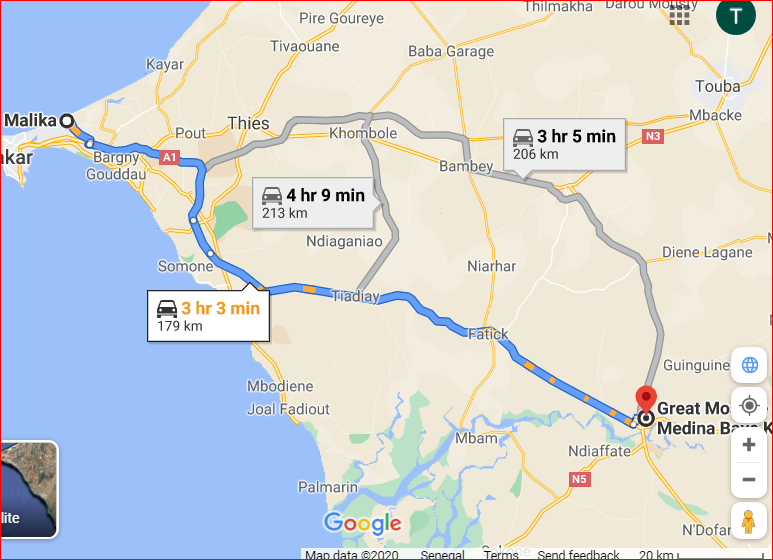

# The Great Circle Distance

Great Circle distance is a distance between two points lying on surface somewhere on earth. This method is considered the most performant and accurate distance calculation among many scientists. This method of distance calculation uses the Haversine Formula.

In [10]:
def great_circle_distance(origin_lat, origin_lon, destination_lat, destination_lon):
    r = 6371 #earth radius in KM
    phi1 = np.radians(origin_lat)
    phi2 = np.radians(destination_lat)
    delta_phi = np.radians(destination_lat - origin_lat)
    delta_lambda = np.radians(destination_lon - origin_lon)
    a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) *   np.sin(delta_lambda / 2)**2
    res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))
    return np.round(res, 2)

Let's calculate our origin and destination using Haversine Formula

In [13]:
origin_latitude = 14.797258213075306
origin_longitude = -17.33764044044377
destination_latitude = 14.161114428585895
destination_longitude = -16.062855285357273

In [15]:
great_circle_distance(14.797258213075306, -17.33764044044377, 14.161114428585895, -16.062855285357273)

154.4

# Manhattan distance

This is a distance between two point with the consideration of prepandicular layout of the map. The distance calculation method is also known a taxicab distance. Most of gps uses this method. \
ManhattanDistance = sum for i to N sum |v1[i] – v2[i]|

In [12]:
def manhattan_distance(origin_lat, origin_lon, destination_lat, destination_lon):
    # Origin coordinates
    p = np.stack(np.array([origin_lat, origin_lon]).reshape(-1,1), axis = 1)
    # Destination coordinates
    d = np.stack(np.array([origin_lat, origin_lon]).reshape(-1,1), axis = 1)
    theta1 = np.radians(-28.904)
    theta2 = np.radians(28.904)
    ## Rotation matrix
    R1 = np.array([[np.cos(theta1), np.sin(theta1)], 
                   [-np.sin(theta1), np.cos(theta1)]])
    R2 = np.array([[np.cos(theta2), np.sin(theta2)], 
                   [-np.sin(theta2), np.cos(theta2)]])
    # Rotate Origin and Destination coordinates by -29 degrees
    pT = R1 @ p.T  
    dT = R1 @ d.T
    
    # Coordinates of hinge point in the rotated world 
    vT = np.stack((pT[0,:], dT[1,:]))
    # Coordinates of Hinge point in the real world 
    v = R2 @ vT
    return (great_circle_distance(p.T[0], p.T[1], v[0], v[1]) +
            great_circle_distance(v[0],v[1], d.T[0],d.T[1] ))

In [14]:
manhattan_distance(origin_latitude, origin_longitude, destination_latitude, destination_longitude)

array([0.])

In [16]:
manhattan_distance(14.797258213075306, -17.33764044044377, 14.161114428585895, -16.062855285357273)

array([0.])

In [18]:
manhattan_distance(origin[0], origin[1], destination[0], destination[1])

array([0.])

I will use the scipy library to do the distance calculation using Manhattan Formula

In [25]:
import scipy.spatial.distance as dist

In [27]:
dist.cityblock(origin, destination)

1.9109289395759088

sources:\
    https://towardsdatascience.com/spatial-distance-and-machine-learning-2cab72fc6284